In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [88]:

# Load the dataset
file_path = './DataCollected.csv'
data = pd.read_csv(file_path)

# Drop the date column
data = data.drop(columns=['Date'])


In [89]:
data_copy = data.copy()
scaler = StandardScaler()
standardized_array = scaler.fit_transform(data_copy)
standardized_df = pd.DataFrame(standardized_array, columns=data_copy.columns)
standardized_df.to_csv('./DataStandardized.csv', index=False)

In [79]:

# 1. Convert Dates and Sort Data
data['Date'] = pd.to_datetime(data['Date'], format='%y%m%d')
data = data.sort_values(by='Date')
print("\nADF test for all data:")
for col in data.columns[2:]:
    result = adfuller(data[col])
    # print(f'{col}: ADF Statistic = {result[0]}, p-value = {result[1]}')
    if result[1] >= 0.05:
        print(f"Warning: {col} might not be stationary. Consider differencing or further transformation.")
        # NVDA, SMA, EMA, AAPL, AMD, AVGO, INTC, QCOM, RF, CBBTCUSD, CBETHUSD, SP500, NASDAQCOM, DJIA, MACD, MACD_Signal, OBV, RSI, SMA_Transformed, EMA_Transformed
    else:
        print(f"{col} is stationary.")

statationary_dataframe = pd.DataFrame(data[['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'ADS_Index', 'MACD_Signal']])



ADF test for all data:
ADS_Index is stationary.
Mkt-RF is stationary.
SMB is stationary.
HML is stationary.
RMW is stationary.
CMA is stationary.
MACD_Signal is stationary.


In [81]:

# 2. Generate Log Returns for Price Columns, and perform ADF test again
price_columns = ['NVDA', 'AAPL', 'AMD', 'AVGO', 'INTC', 'QCOM', 'SP500', 'NASDAQCOM', 'DJIA', 'CBBTCUSD', 'CBETHUSD']
for col in price_columns:
    data[f'{col}_Log_Return'] = np.log(data[col] / data[col].shift(1))

# Generate log returns for price columns and store in a separate DataFrame called price_data
price_data = pd.DataFrame()
for col in price_columns:
    price_data[f'{col}_Log_Return'] = np.log(data[col] / data[col].shift(1))

# Drop rows with NaN values in price_data (this removes the first row)
price_data.dropna(inplace=True)

# Perform ADF test on each log return column in price_data
for col in price_data.columns:
    result = adfuller(price_data[col])
    adf_stat = result[0]
    p_value = result[1]
    if p_value >= 0.05:
        print(f"Warning: {col} might not be stationary (ADF p-value: {p_value}). Consider differencing or further transformation.")
    else:
        print(f"{col} is stationary (ADF p-value: {p_value}).")

# Mean, Variance, and Standard Deviation of Log Returns
mean_log_returns = price_data.mean()
var_log_returns = price_data.var()
std_log_returns = price_data.std()
print("\nMean Log Returns:")
print(mean_log_returns)
print("\nVariance Log Returns:")
print(var_log_returns)
print("\nStandard Deviation Log Returns:")
print(std_log_returns)

for col in price_data.columns:
    statationary_dataframe[col] = price_data[col]



NVDA_Log_Return is stationary (ADF p-value: 0.0005617560742181237).
AAPL_Log_Return is stationary (ADF p-value: 6.64843080629251e-27).
AMD_Log_Return is stationary (ADF p-value: 3.254594967872574e-29).
AVGO_Log_Return is stationary (ADF p-value: 2.326550419529652e-06).
INTC_Log_Return is stationary (ADF p-value: 2.795549829019978e-11).
QCOM_Log_Return is stationary (ADF p-value: 5.067158030429566e-30).
SP500_Log_Return is stationary (ADF p-value: 1.6591188458800173e-27).
NASDAQCOM_Log_Return is stationary (ADF p-value: 3.5341037399406276e-28).
DJIA_Log_Return is stationary (ADF p-value: 5.529207192709668e-26).
CBBTCUSD_Log_Return is stationary (ADF p-value: 6.484343799620256e-30).
CBETHUSD_Log_Return is stationary (ADF p-value: 1.6153815237993714e-29).

Mean Log Returns:
NVDA_Log_Return         0.003603
AAPL_Log_Return         0.000779
AMD_Log_Return          0.001222
AVGO_Log_Return         0.002565
INTC_Log_Return        -0.001964
QCOM_Log_Return         0.001735
SP500_Log_Return    

In [86]:
# 3. Transform Indicators to Improve Stationarity
indicator_data = data[['RF', 'SMA', 'EMA', 'MACD', 'MACD_Signal', 'RSI', 'OBV']].copy()

for col in indicator_data.columns:
    min_val = indicator_data[col].min()
    if min_val <= 0:
        shift_val = 1 - min_val
        indicator_data[col] = indicator_data[col] + shift_val
    
    # Apply log transformation
    indicator_data[col] = np.log(indicator_data[col])

# Drop rows with NaN if any appear after transformations
indicator_data.dropna(inplace=True)

# Perform ADF test on each transformed column and print results
for col in indicator_data.columns:
    result = adfuller(indicator_data[col])
    adf_stat = result[0]
    p_value = result[1]
    if p_value < 0.05:
        print(f"{col} is stationary (ADF p-value: {p_value}).")
    else:
        print(f"Warning: {col} might not be stationary (ADF p-value: {p_value}). Consider differencing or further transformation.")



MACD is stationary (ADF p-value: 0.03223728033218657).
OBV is stationary (ADF p-value: 0.006100337305312222).


In [58]:

# 4. Perform Stationarity Tests on Log Returns
print("\nStationarity Test Results for Log Returns (Augmented Dickey-Fuller Test):")
for col in [f'{col}_Log_Return' for col in price_columns]:
    result = adfuller(data[col])
    print(f'{col}: ADF Statistic = {result[0]}, p-value = {result[1]}')
    if result[1] >= 0.05:
        print(f"Warning: {col} might not be stationary. Consider differencing or further transformation.")



Stationarity Test Results for Log Returns (Augmented Dickey-Fuller Test):
NVDA_Log_Return: ADF Statistic = -4.084196258749243, p-value = 0.0010284489596306407
AAPL_Log_Return: ADF Statistic = -14.866414408806659, p-value = 1.6888160830680817e-27
AMD_Log_Return: ADF Statistic = -16.275035869033445, p-value = 3.45726043444984e-29
AVGO_Log_Return: ADF Statistic = -5.364910980840729, p-value = 4.012028740495527e-06
INTC_Log_Return: ADF Statistic = -7.5569804888750065, p-value = 3.080964384132917e-11
QCOM_Log_Return: ADF Statistic = -17.883584004848846, p-value = 2.9959972637028434e-30
SP500_Log_Return: ADF Statistic = -14.87473095121178, p-value = 1.6430798640173642e-27
NASDAQCOM_Log_Return: ADF Statistic = -15.399667309918883, p-value = 3.2277688080765924e-28
DJIA_Log_Return: ADF Statistic = -13.861046772462199, p-value = 6.728398521150448e-26
CBBTCUSD_Log_Return: ADF Statistic = -17.133239614712117, p-value = 7.126130085567745e-30
CBETHUSD_Log_Return: ADF Statistic = -16.580008889998187

In [59]:
# 5. Perform Stationarity Tests on Transformed Indicators
print("\nStationarity Test Results for Transformed Indicators (Augmented Dickey-Fuller Test):")
for col in transformed_indicator_columns:
    series = data[col].dropna()  # Ensure no NaNs
    result = adfuller(series)
    print(f'{col}: ADF Statistic = {result[0]}, p-value = {result[1]}')
    if result[1] >= 0.05:
        print(f"Warning: {col} might still not be stationary.")



Stationarity Test Results for Transformed Indicators (Augmented Dickey-Fuller Test):
SMA_Second_Diff: ADF Statistic = -3.442377877454842, p-value = 0.009596303346855972
EMA_Second_Diff: ADF Statistic = -4.569529985167326, p-value = 0.00014694510535515274
MACD_Transformed: ADF Statistic = -3.535396639380977, p-value = 0.007123229580268911
MACD_Signal_Transformed: ADF Statistic = -3.8199691547702623, p-value = 0.0027094866305538944
RSI_Transformed: ADF Statistic = -16.363202979537125, p-value = 2.857288712393013e-29
OBV_Transformed: ADF Statistic = -7.3024461347473055, p-value = 1.3277379763782725e-10


In [60]:
# Data is already stationary, so no further transformation is needed!

"""
# 6. Z-Score Standardization for Log Returns
scaler_log_returns = StandardScaler()
log_return_columns = [f'{col}_Log_Return' for col in price_columns]
data[log_return_columns] = scaler_log_returns.fit_transform(data[log_return_columns])
"""


"\n# 6. Z-Score Standardization for Log Returns\nscaler_log_returns = StandardScaler()\nlog_return_columns = [f'{col}_Log_Return' for col in price_columns]\ndata[log_return_columns] = scaler_log_returns.fit_transform(data[log_return_columns])\n"

In [61]:
# 7. Z-Score Standardization for Transformed Indicators

scaler_indicators = StandardScaler()
data[transformed_indicator_columns] = scaler_indicators.fit_transform(data[transformed_indicator_columns])


In [62]:

# 8. Check for Missing Values
print("\nMissing Values Check:")
print(data.isnull().sum())



Missing Values Check:
Unnamed: 0                 0
Date                       0
NVDA                       0
SMA                        0
EMA                        0
AAPL                       0
AMD                        0
AVGO                       0
INTC                       0
QCOM                       0
ADS_Index                  0
Mkt-RF                     0
SMB                        0
HML                        0
RMW                        0
CMA                        0
RF                         0
CBBTCUSD                   0
CBETHUSD                   0
SP500                      0
NASDAQCOM                  0
DJIA                       0
MACD                       0
MACD_Signal                0
OBV                        0
RSI                        0
NVDA_Log_Return            0
AAPL_Log_Return            0
AMD_Log_Return             0
AVGO_Log_Return            0
INTC_Log_Return            0
QCOM_Log_Return            0
SP500_Log_Return           0
NASDAQCOM_Log_Return


Outlier Detection:


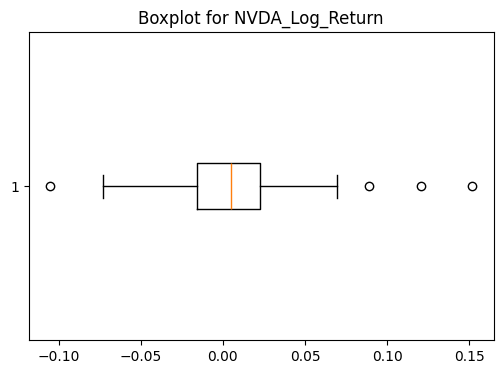

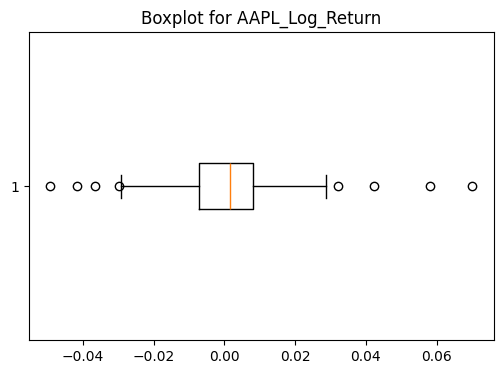

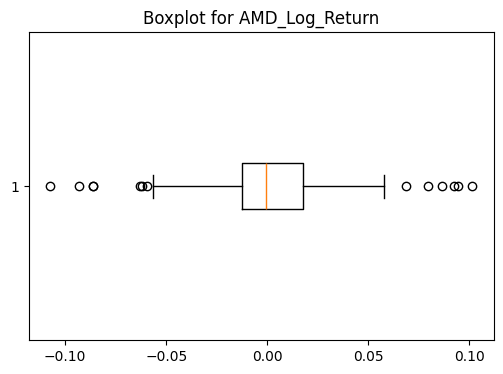

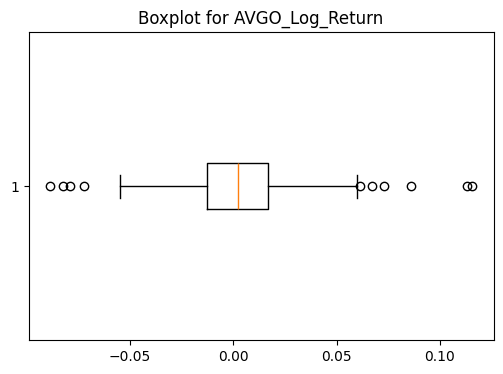

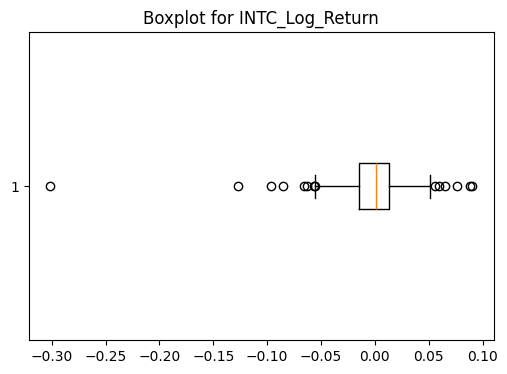

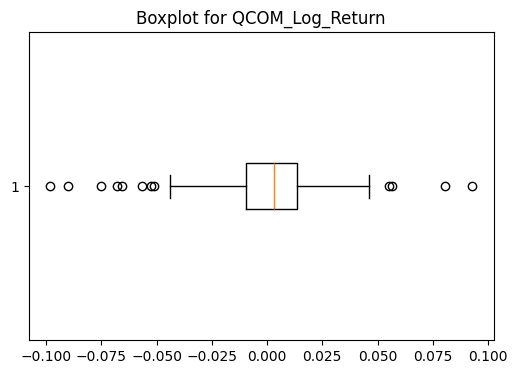

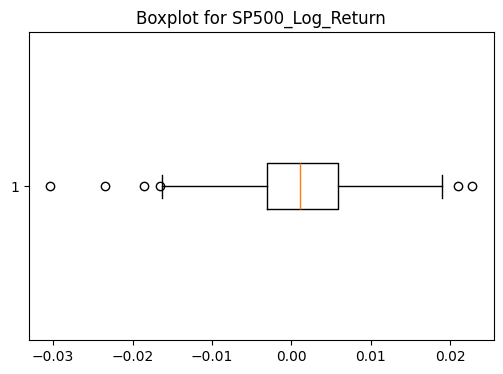

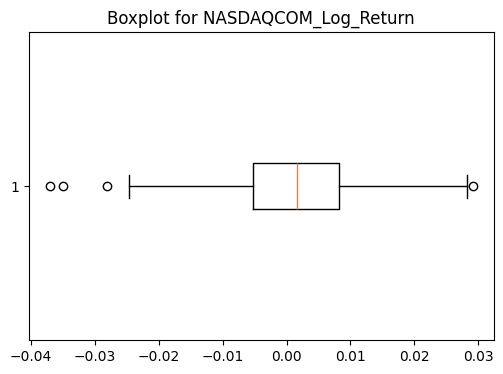

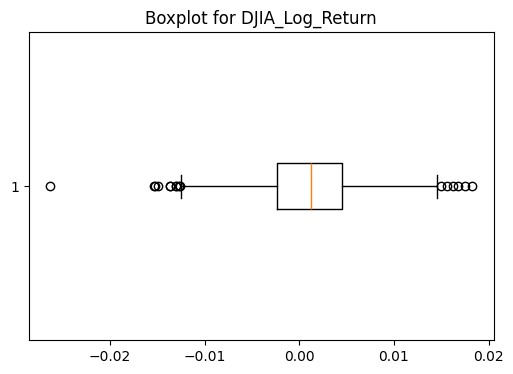

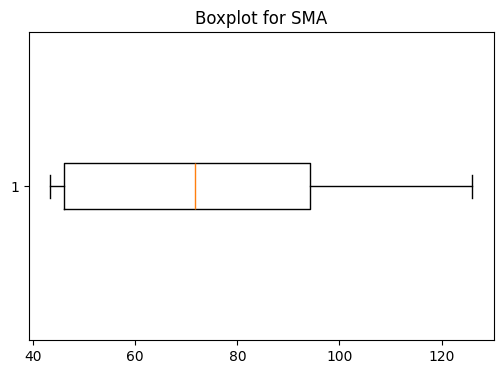

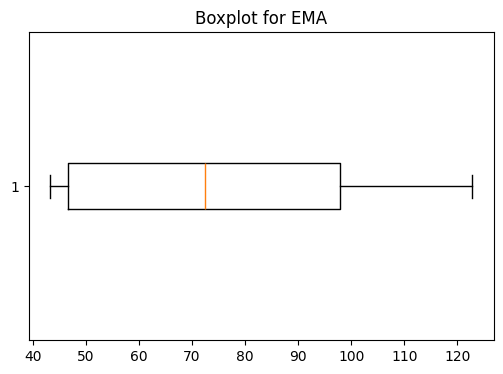

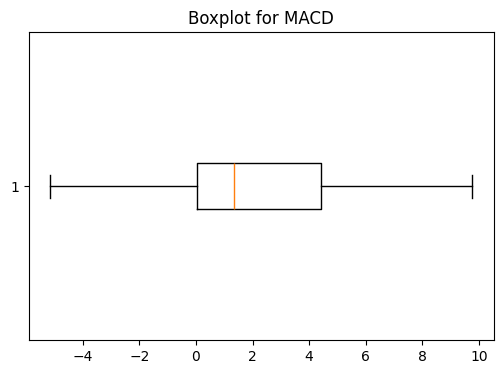

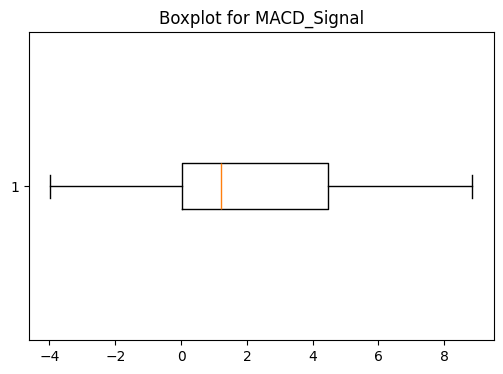

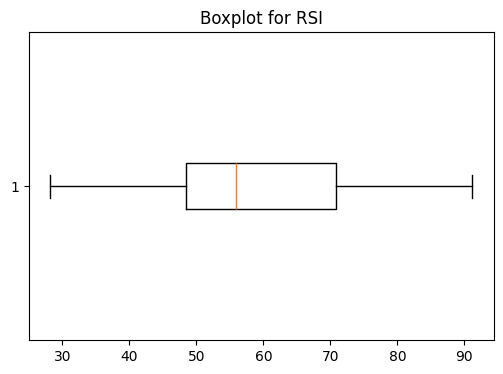

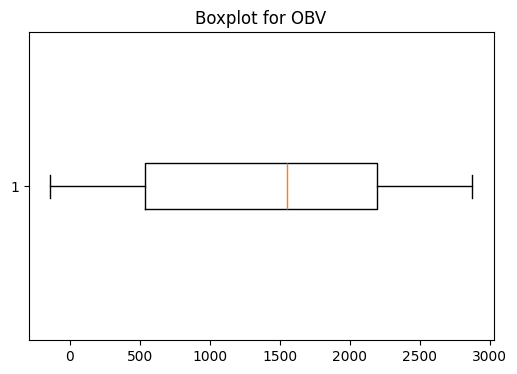

In [63]:

# 9. Detect and Handle Outliers (Visualize and Optionally Remove)
print("\nOutlier Detection:")
for column in log_return_columns + indicator_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column], vert=False)
    plt.title(f'Boxplot for {column}')
    plt.show()

# Optional: Remove outliers using the IQR method
for column in log_return_columns + indicator_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [64]:

# 10. Check Correlation Matrix to Address Multicollinearity
print("\nCorrelation Matrix:")
correlation_matrix = data[log_return_columns + indicator_columns].corr()
print(correlation_matrix)

# (Optional) Drop highly correlated features if necessary
# Example: Drop SP500_Log_Return if it is highly correlated with NASDAQCOM_Log_Return or DJIA_Log_Return
# data = data.drop('SP500_Log_Return', axis=1)



Correlation Matrix:
                      NVDA_Log_Return  AAPL_Log_Return  AMD_Log_Return  \
NVDA_Log_Return              1.000000         0.078215        0.399944   
AAPL_Log_Return              0.078215         1.000000        0.114492   
AMD_Log_Return               0.399944         0.114492        1.000000   
AVGO_Log_Return              0.492698         0.267273        0.343558   
INTC_Log_Return              0.173761         0.176865        0.423263   
QCOM_Log_Return              0.352916         0.235594        0.411824   
SP500_Log_Return             0.461554         0.403245        0.469031   
NASDAQCOM_Log_Return         0.589885         0.472516        0.530587   
DJIA_Log_Return              0.070401         0.240600        0.217581   
SMA                          0.048242         0.208930       -0.049281   
EMA                          0.044936         0.204155       -0.058263   
MACD                         0.007472         0.005146       -0.148343   
MACD_Signal      

In [65]:

# 11. Prepare Final Dataset
final_columns = log_return_columns + indicator_columns
data = data.reset_index(drop=True)
final_data = data[final_columns]


# Save preprocessed data to a new file
output_file_path = './DataPreprocessed.csv'
final_data.to_csv(output_file_path)
print(f"\nPreprocessed data saved to {output_file_path}")



Preprocessed data saved to ./DataPreprocessed.csv
